# The Titanic Dataset

In this simple EDA, we will be analysing the titanic data set by looking and visualizing its main features. I will try to find patterns, and discover how different parts of the data are connected.

In [1]:
# import pandas and seaborn as pd and sns respectively
import pandas as pd 
import seaborn as sns

In [2]:
#Reading in the table into pandas from https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv store as variable titanic
#output the table titanic afterwards
titanic = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
#General overview of Titanic Data Set
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


<Axes: xlabel='Age', ylabel='Fare'>

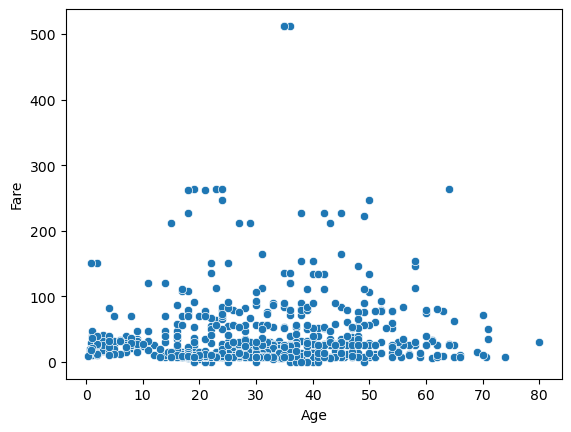

In [6]:
#A seaborn scatterplot to see: Is there a pattern between age and fare price?
sns.scatterplot(titanic, x = "Age", y = "Fare")

<Axes: xlabel='Survived', ylabel='count'>

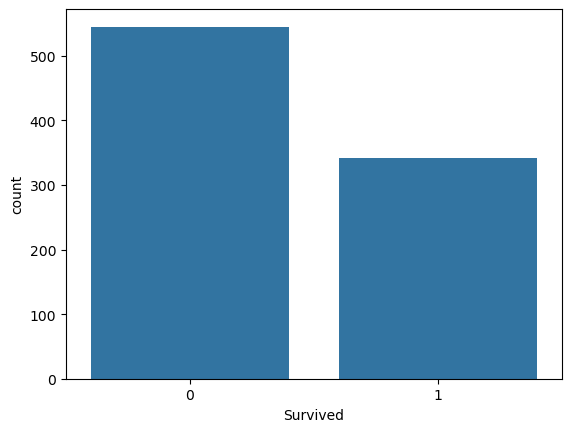

In [7]:
# A seaborn countplot to compare the number of people who died and those who survived as bars
sns.countplot(x ='Survived', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

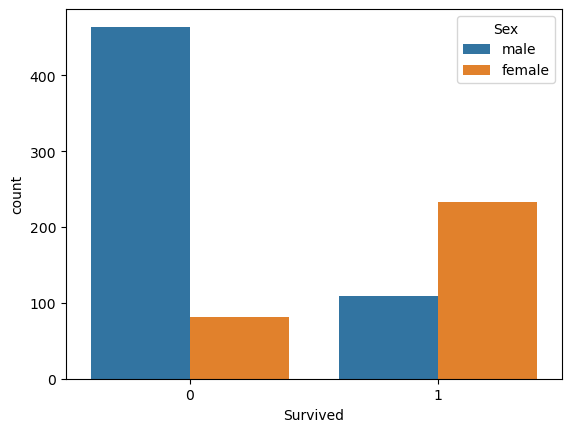

In [8]:
#countplot to show who survived but splitted (through hue) by Sex
sns.countplot(x ='Survived', data = titanic, hue = "Sex")

<Axes: xlabel='Fare', ylabel='Density'>

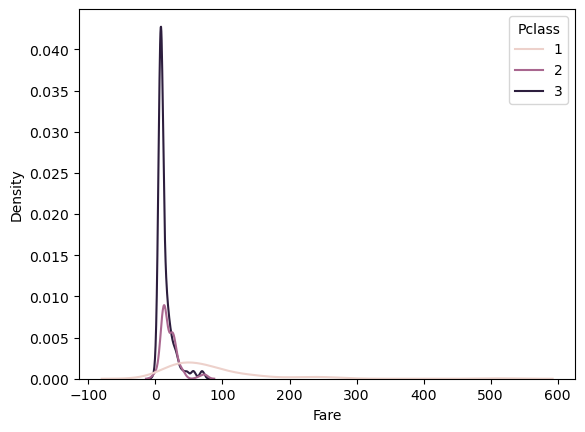

In [9]:
# KDE-Plot of Fare distributions, split by PClass (through the heu-aesthetics)
sns.kdeplot(titanic, x = "Fare", hue = "Pclass")

<Axes: xlabel='Pclass', ylabel='Fare'>

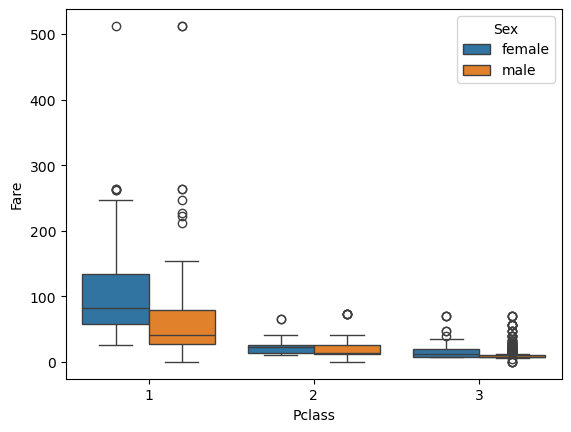

In [11]:
#Boxplot of the same relationship as above (Fare by PClass), using the x-aesthetic, splitted by sex

sns.boxplot(titanic, y = "Fare", x = "Pclass", hue = "Sex")

<Axes: xlabel='Age', ylabel='Survived'>

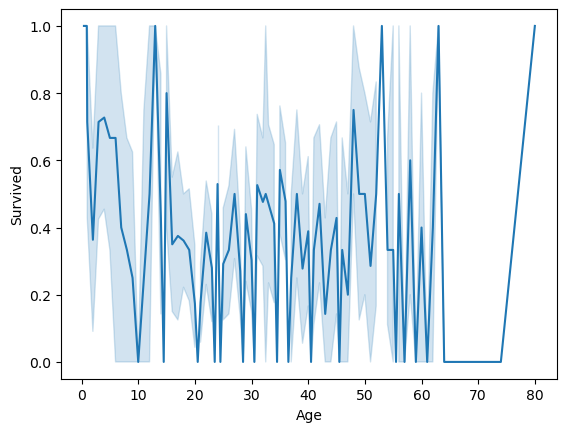

In [12]:
# Plot a lineplot between "Survived" (y-axis) and "Age" (x-Axis)

sns.lineplot(titanic, x = "Age", y = "Survived")

<Axes: xlabel='Pclass', ylabel='Fare'>

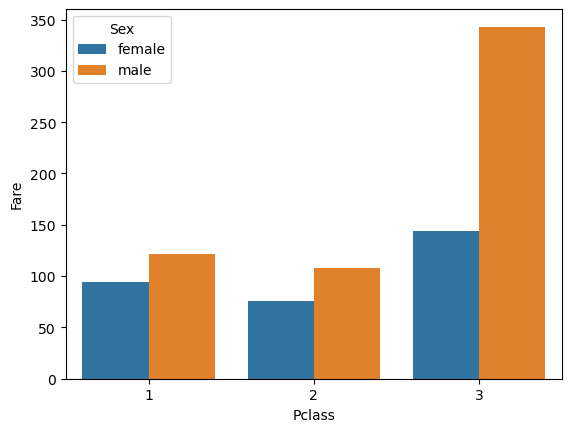

In [14]:
#Bar (count) plot of how many people were in each passenger class, splitted by sex
sns.barplot(titanic, x = "Pclass", y = "Fare", estimator = len, hue = "Sex" )

In [15]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [17]:
# Using the loc-method to get all passengers with an Age over 70
titanic.loc[titanic["Age"] > 70, ["Name","Age"] ]

,Name,Age
95,Mr. George B Goldschmidt,71.0
115,Mr. Patrick Connors,70.5
490,Mr. Ramon Artagaveytia,71.0
627,Mr. Algernon Henry Wilson Barkworth,80.0
847,Mr. Johan Svensson,74.0


In [19]:
# Count of passengers paid more than 100 Dollars for their trip
titanic.loc[titanic["Fare"] > 100, ["Name"]].count()

Name    53
dtype: int64

In [20]:
#Show the names of all passengers in Pclass 2 or worse (higher), that is below 18
titanic.loc[(titanic["Pclass"] >= 2) & (titanic["Age"] < 18), "Name"]

7            Master. Gosta Leonard Palsson
9       Mrs. Nicholas (Adele Achem) Nasser
10          Miss. Marguerite Rut Sandstrom
14     Miss. Hulda Amanda Adolfina Vestrom
16                     Master. Eugene Rice
                      ...                 
848                 Miss. Nourelain Boulos
859               Miss. Dorothy Edith Sage
865         Master. Harold Theodor Johnson
871               Miss. Adele Kiamie Najib
884         Miss. Catherine Helen Johnston
Name: Name, Length: 118, dtype: object

In [21]:
#Percentage of female passengers in the dataframe
((titanic.loc[titanic["Sex"] == "female","Name"].count()) / titanic["Name"].count()) * 100

35.400225479143174

In [27]:
#How much did the passengers on average pay in each passenger class?
avgcf = titanic.groupby("Pclass")["Fare"].mean()
avgcf

Pclass
1    84.154687
2    20.662183
3    13.707707
Name: Fare, dtype: float64

In [36]:
#Important values to notice

#Number of all passengers in the table:
titanic["Name"].count()

887

In [43]:
#Number of passengers that survived:
titanic.loc[titanic["Survived"] == 1, "Survived"].count()

342

In [42]:
#Number of female passengers on the titanic:
titanic.loc[titanic["Sex"] == "female","Survived"].count()

314

In [44]:
#Number of female passengers that have survived:
titanic.loc[(titanic["Sex"] == "female") & (titanic["Survived"] == 1),"Survived"].count()

233

In [47]:
#With those numbers calculate the following probabilities:
#General chance of survival
(titanic.loc[titanic["Survived"] == 1, "Survived"].count()) / (titanic["Name"].count()) * 100

38.55693348365276

In [48]:
#Chance of surival for female passengers
(titanic.loc[(titanic["Sex"] == "female") & (titanic["Survived"] == 1),"Survived"].count()) / (titanic["Name"].count()) * 100

26.268320180383313

In [50]:
#Chance of surival for Male passengers
(titanic.loc[(titanic["Sex"] == "male") & (titanic["Survived"] == 1),"Survived"].count()) / (titanic["Name"].count()) * 100

12.288613303269448